In [4]:
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from project.dataset import load_emails_dataset_from_directory

## Load Dataset

In [5]:
emails = load_emails_dataset_from_directory('./datasets/fraud_email_.csv')

In [6]:
emails

Text  Class
0      Supply Quality China's EXCLUSIVE dimensions at...      1
1                             over. SidLet me know. Thx.      0
2      Dear Friend,Greetings to you.I wish to accost ...      1
3      MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....      1
4              Not a surprising assessment from Embassy.      0
...                                                  ...    ...
11924  Travel well. I'll look forward to hearing your...      0
11925  Dear friend, I wish to begin by way of introdu...      1
11926  Follow Up Flag: Follow upFlag Status: FlaggedM...      0
11927  sbwhoeop B6Saturday January 23 2010 4:09 PMRe:...      0
11928  FYI. We are revising call sheet for call to Ka...      0

[11929 rows x 2 columns]

In [7]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11929 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 186.5+ KB


## EDA

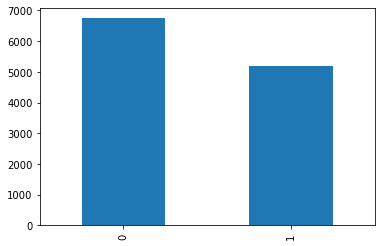

In [8]:
emails.Class.value_counts().plot(kind='bar')

In [9]:
emails[ emails.Text.isna() ]

Text  Class
5129  NaN      1

In [10]:
emails.dropna(inplace=True)

In [11]:
emails

Text  Class
0      Supply Quality China's EXCLUSIVE dimensions at...      1
1                             over. SidLet me know. Thx.      0
2      Dear Friend,Greetings to you.I wish to accost ...      1
3      MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....      1
4              Not a surprising assessment from Embassy.      0
...                                                  ...    ...
11924  Travel well. I'll look forward to hearing your...      0
11925  Dear friend, I wish to begin by way of introdu...      1
11926  Follow Up Flag: Follow upFlag Status: FlaggedM...      0
11927  sbwhoeop B6Saturday January 23 2010 4:09 PMRe:...      0
11928  FYI. We are revising call sheet for call to Ka...      0

[11928 rows x 2 columns]

## Wordcloud

In [12]:
spams = emails[ emails.Class == 1 ]
hams  = emails[ emails.Class == 0 ]

In [13]:
import matplotlib.pyplot as plt
from pandas import Series
from wordcloud import WordCloud

def generate_word_cloud(texts: Series):
    whole_text = ' '.join(texts.to_list())
    wordcloud = WordCloud(width=1024, height=768, background_color='white').generate(whole_text)
    
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

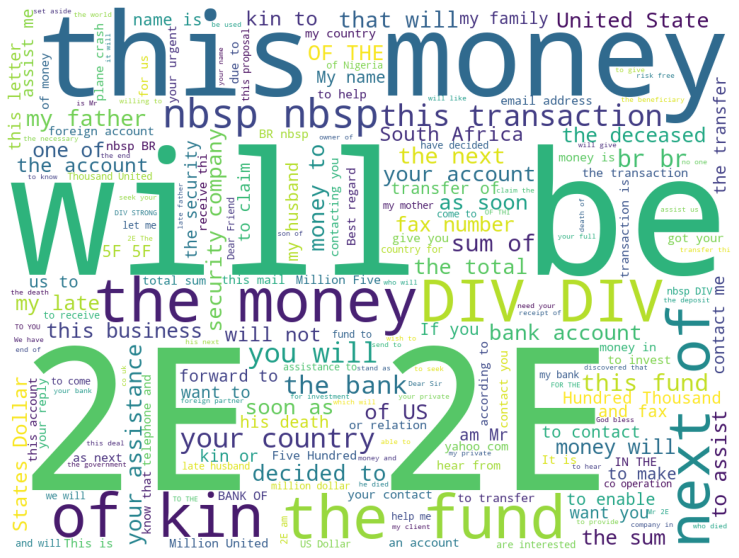

In [14]:
generate_word_cloud(spams.Text)

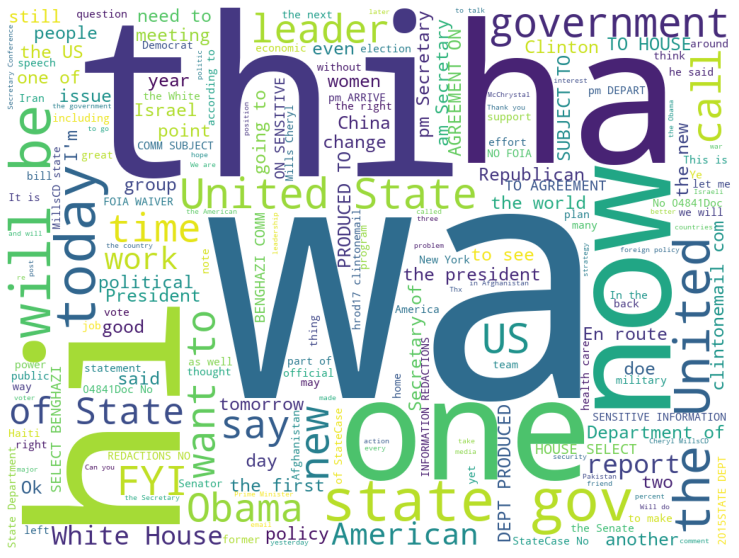

In [15]:
generate_word_cloud(hams.Text)

In [17]:
from functools import reduce

def pipe(arg, *funcs):
    return reduce(lambda current_value, func: func(current_value), funcs, arg)

In [18]:
TOKENIZER = WordPunctTokenizer()
STEMMER = PorterStemmer()
STOPWORD = stopwords.words("english")

In [19]:
def _trim(input_text: str) -> str: 
    return input_text.strip()

def _to_lower(input_text: str) -> str:
    return input_text.lower()

import string 
import re
from unicodedata import normalize


def _remove_accents(input_text: str) -> str: 
    return normalize('NFKD', input_text).encode('ASCII', 'ignore').decode('utf-8')

def _remove_punct(input_text: str) -> str:
    return input_text.translate(str.maketrans('', '', string.punctuation))

def _remove_web_text(input_text: str) -> str: 
    return re.sub(r'\b(div|2E|nbsp|br|5F)\b', r'', input_text, flags=re.IGNORECASE)

def _decompose_word(input_text: str) -> str: 
    return re.sub(r'\b(\w+)\b-\b(\w+)\b', r'\1 \2', input_text)

def _stemmize(input_text: str) -> str:
    return STEMMER.stem(input_text)

def _transform_text(input_text: str) -> str: 
    tokens = TOKENIZER.tokenize(input_text)
    
    filtered_word = [ _stemmize(word) for word in tokens if not word in STOPWORD ]
    
    return ' '.join(filtered_word)

def normalize_text(input_text: str) -> str:
    return pipe(input_text, _trim, _to_lower, _remove_accents, _remove_punct, _decompose_word, _remove_web_text, _transform_text)


In [20]:
emails['normalized_text'] = emails.Text.apply(normalize_text)

In [104]:
emails

Text  Class  \
0      Supply Quality China's EXCLUSIVE dimensions at...      1   
1                             over. SidLet me know. Thx.      0   
2      Dear Friend,Greetings to you.I wish to accost ...      1   
3      MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....      1   
4              Not a surprising assessment from Embassy.      0   
...                                                  ...    ...   
11924  Travel well. I'll look forward to hearing your...      0   
11925  Dear friend, I wish to begin by way of introdu...      1   
11926  Follow Up Flag: Follow upFlag Status: FlaggedM...      0   
11927  sbwhoeop B6Saturday January 23 2010 4:09 PMRe:...      0   
11928  FYI. We are revising call sheet for call to Ka...      0   

                                         normalized_text  
0      suppli qualiti china exclus dimens unbeat pric...  
1                                        sidlet know thx  
2      dear friendgreet youi wish accost request woul...  
3      mr cheung puihang seng bank ltdde voeux rd bra...  
4                                 surpris assess embassi  
...                                                  ...  
11924           travel well ill look forward hear report  
11925  dear friend wish begin way introduct william m...  
11926    follow flag follow upflag statu flaggedmor info  
11927  sbwhoeop b6saturday januari 23 2010 409 pmre h...  
11928    fyi revis call sheet call karzai potenti sunday  

[11928 rows x 3 columns]

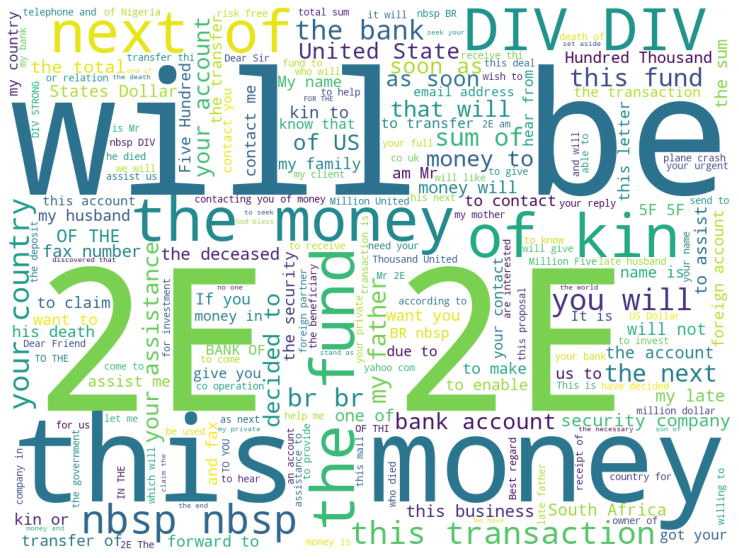

In [21]:
generate_word_cloud(emails[emails.Class == 1].Text)

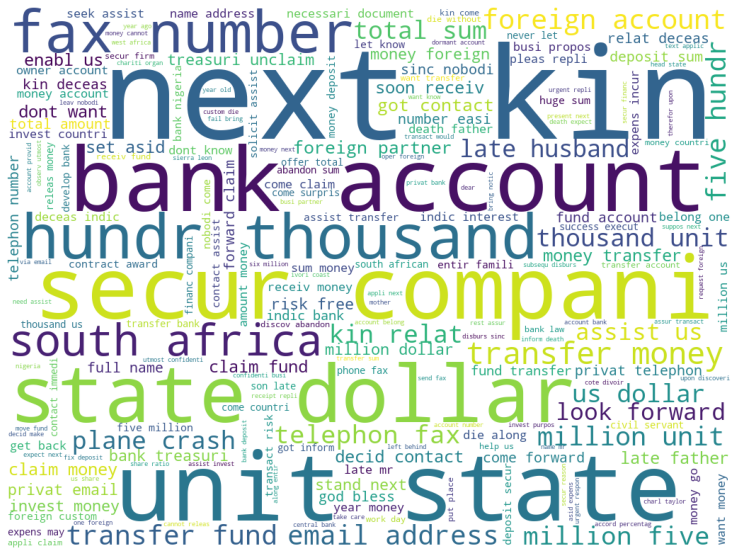

In [22]:
generate_word_cloud(emails[emails.Class == 1].normalized_text)

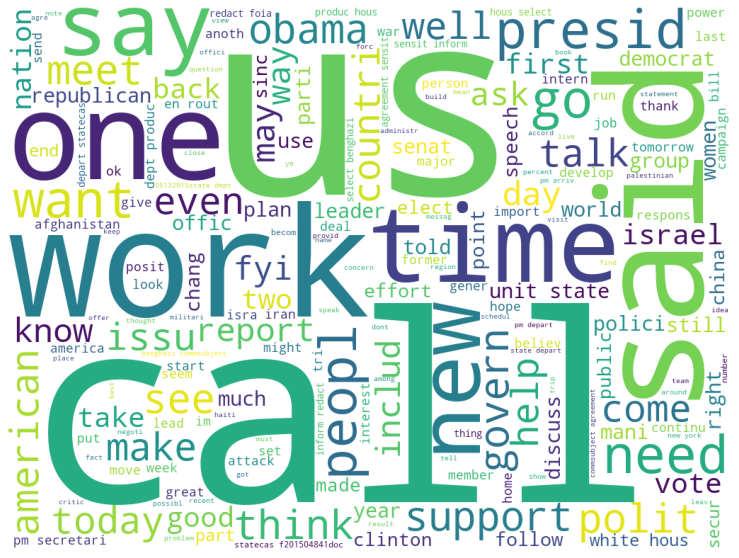

In [23]:
generate_word_cloud(emails[emails.Class == 0].normalized_text)

In [24]:
"Hoje vai fazer sol"
"Hoje não vai fazer sol"

'Hoje não vai fazer sol'

In [105]:
pd.DataFrame(data={'Hoje': [1,1],
                  'não': [0, 1],
                  'vai': [1, 1],
                  'fazer': [1, 1],
                  'sol': [1,1]})

Hoje  não  vai  fazer  sol
0     1    0    1      1    1
1     1    1    1      1    1

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

whole_train_data = tfidf.fit_transform(emails.normalized_text)

In [27]:
whole_train_data

<11928x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 886636 stored elements in Compressed Sparse Row format>

In [28]:
pd.DataFrame.sparse.from_spmatrix(whole_train_data)

0     1     2     3     4     5     6     7     8     9     ...  4990  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
11923   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
11924   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
11925   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
11926   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
11927   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       4991  4992  4993  4994  4995  4996      4997  4998  4999  
0       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  
1       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  
...     ...   ...   ...   ...   ...   ...       ...   ...   ...  
11923   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  
11924   0.0   0.0   0.0   0.0   0.0   0.0  0.131066   0.0   0.0  
11925   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  
11926   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  
11927   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  

[11928 rows x 5000 columns]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(whole_train_data, emails.Class, test_size=.3)

model = LogisticRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [30]:
model.score(x_test, y_test)

0.9689857502095558

In [31]:
input_email = BeautifulSoup("""
> Can someone explain what type of operating system Solaris 
> is... as ive never seen or used it i dont know wheather to 
> get a server from Sun or from DELL i would prefer a linux 
> based server and Sun seems to be the one for that but im not 
> sure if Solaris is a distro of linux or a completely 
> different operating system? can someone explain...
> 
> Kiall Mac Innes

""").get_text()

In [32]:
email_to_classify = tfidf.transform([input_email])

In [33]:
email_to_classify

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [106]:
pd.DataFrame.sparse.from_spmatrix(email_to_classify)

0     1     2     3     4     5     6     7     8     9     ...  4990  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   4991  4992  4993  4994  4995  4996  4997  4998  4999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1 rows x 5000 columns]

In [34]:
model.predict(email_to_classify)

array([0])

In [36]:
train_data = pd.DataFrame.sparse.from_spmatrix(whole_train_data).sparse.to_dense()

In [46]:
label = emails.Class.apply(lambda x: 'spam' if x ==1 else 'ham')
label.name = 'label'

In [49]:
train_data['spam'] = label

In [107]:
train_data

0    1    2    3    4    5    6    7    8    9  ...  4991  4992  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11923  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
11924  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
11925  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
11926  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
11927  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

       4993  4994  4995  4996      4997  4998  4999  spam  
0       0.0   0.0   0.0   0.0  0.000000   0.0   0.0  spam  
1       0.0   0.0   0.0   0.0  0.000000   0.0   0.0   ham  
2       0.0   0.0   0.0   0.0  0.000000   0.0   0.0  spam  
3       0.0   0.0   0.0   0.0  0.000000   0.0   0.0  spam  
4       0.0   0.0   0.0   0.0  0.000000   0.0   0.0   ham  
...     ...   ...   ...   ...       ...   ...   ...   ...  
11923   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   ham  
11924   0.0   0.0   0.0   0.0  0.131066   0.0   0.0   ham  
11925   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  spam  
11926   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   ham  
11927   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   ham  

[11928 rows x 5001 columns]

In [88]:
import pycaret
from pycaret.classification import (
    setup, 
    create_model, 
    tune_model, 
    plot_model, 
    evaluate_model, 
    predict_model,
    finalize_model,
    save_model,
    load_model,
)



In [ ]:
classifiers = setup(data=train_data, target='spam', numeric_features=[str(x) for x in list(range(5000))])

In [56]:
top_3 = compare_models(n_select=3, include=['dt','rf', 'lr', 'nb', 'knn'], sort='AUC')

In [57]:
lr = create_model('lr')
nb = create_model('nb')

In [61]:
tuned_lr = tune_model(lr, optimize='AUC')

In [63]:
tuned_nb = tune_model(nb, optimize='AUC')

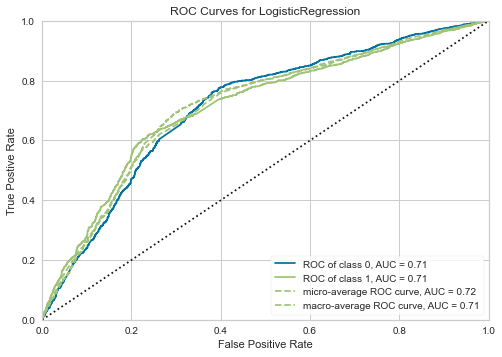

In [65]:
plot_model(tuned_lr)

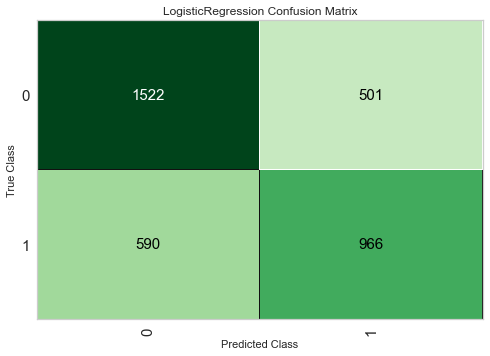

In [71]:
plot_model(tuned_lr, plot='confusion_matrix')

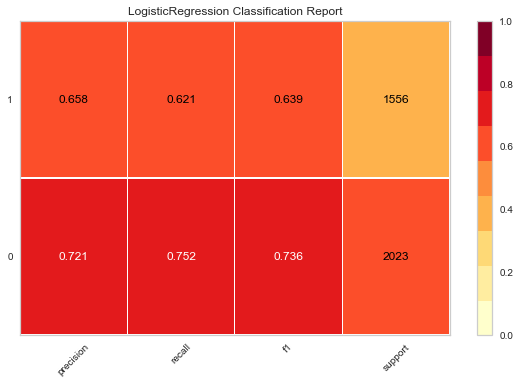

In [74]:
plot_model(tuned_lr, plot='class_report')

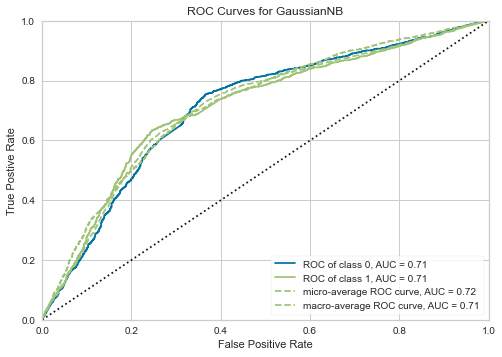

In [66]:
plot_model(tuned_nb)

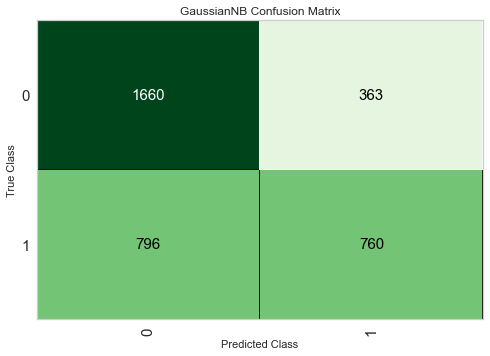

In [75]:
plot_model(tuned_nb, plot='confusion_matrix')

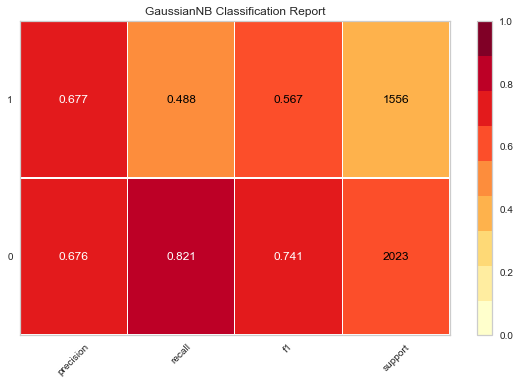

In [78]:
plot_model(tuned_nb, plot='class_report')

In [79]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [80]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [93]:
predict_model(estimator=tuned_lr, data=pd.DataFrame.sparse.from_spmatrix(email_to_classify).sparse.to_dense())

0    1    2    3    4    5    6    7    8    9  ...  4992  4993  4994  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

   4995  4996  4997  4998  4999  Label   Score  
0   0.0   0.0   0.0   0.0   0.0    ham  0.4581  

[1 rows x 5002 columns]

In [94]:
predict_model(estimator=tuned_nb, data=pd.DataFrame.sparse.from_spmatrix(email_to_classify).sparse.to_dense())

0    1    2    3    4    5    6    7    8    9  ...  4992  4993  4994  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

   4995  4996  4997  4998  4999  Label   Score  
0   0.0   0.0   0.0   0.0   0.0    ham  0.3512  

[1 rows x 5002 columns]

In [95]:
finalize_model(tuned_lr)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=0.373, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6575, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Logistic Regression Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:

LogisticRegression(C=0.373, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6575, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
finalize_model(tuned_nb)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=GaussianNB(priors=None, var_smoothing=1), ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Naive Bayes Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 2
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 3
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 4
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
I

GaussianNB(priors=None, var_smoothing=1)

In [99]:
save_model(tuned_lr, model_name='./models/linear_regression')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=0.373, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6575, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=./models/linear_regression, model_only=False, verbose=True)
INFO:logs:Adding model into prep_pipe
INFO:logs:./models/linear_regression.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=['0', '1', '2', '3',
                                                          '4', '5', '6',

Transformation Pipeline and Model Succesfully Saved


In [100]:
save_model(tuned_nb, model_name='./models/gaussian_naive_bayes')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GaussianNB(priors=None, var_smoothing=1), model_name=./models/gaussian_naive_bayes, model_only=False, verbose=True)
INFO:logs:Adding model into prep_pipe
INFO:logs:./models/gaussian_naive_bayes.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=['0', '1', '2', '3',
                                                          '4', '5', '6', '7',
                                                          '8', '9', '10', '11',
                                                          '12', '13', '14',
                                                          '15', '16', '17',
                                                 

Transformation Pipeline and Model Succesfully Saved


In [ ]:
lr_model = load_model('./models/linear_regression')